# Seminar: Python畫圖套件(Matplotlib)的使用

**需安裝影像轉譯套件ffmpeg，指令:**  pip install ffmpeg

本次目標: 教學 python 如何使用 matplotlib 進行資料可視化

## 呼叫函式庫

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 選擇要使用的繪圖風格 or 使用 magic method (%matplotlib notebook) ，如果都不更換繪圖風格，只用預設值，圖形輸出會比較醜

如果要切換style，需要重啟此notebook，否則某些沒更改的style會被保留

In [2]:
# Magic method: 推薦使用，專為juypter notebook設定，可以跟圖直接互動(放大、縮小、移動...)
# render engine: nbAgg
%matplotlib notebook

# 指定風格
# demo參考: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.style.use("seaborn-colorblind")

# 風格查看
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
# 自定義風格
#plt.rcParams['figure.figsize'] = [8.0, 6.0]
#plt.rcParams['figure.dpi'] = 80
#plt.rcParams['savefig.dpi'] = 100
#plt.rcParams['font.family'] = "monospace"
#plt.rcParams['font.weight'] = "bold"
#plt.rcParams['font.size'] = 12
#plt.rcParams['legend.fontsize'] = 'large'
#plt.rcParams['axes.axisbelow'] = True
#plt.rcParams['ytick.color'] = 'black'
#plt.rcParams['xtick.color'] = 'black'
#plt.rcParams['axes.axisbelow'] = True
#plt.rcParams['axes.edgecolor'] = "white"
#plt.rcParams['axes.facecolor'] = "#E5E5E5"

# matplotlib BUG: https://github.com/matplotlib/matplotlib/issues/19040
# 似乎是預設style的後端GUI渲染引擎(backend_inline)，無法清除之前的buffer，導致文字堆疊
# 可透過修改savefig.facecolor 修改此問題 或是 更換render engine解決問題
plt.rcParams['savefig.facecolor'] = "white" # OK
#plt.rcParams['savefig.facecolor'] = "auto" # FAIL, make text disorder

# show detail at current style
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9'])
axes.spines.bottom: True
axes.spines.left: True


## I. 常見的繪圖方式

1. 折線圖 plt.plot()
2. 散佈圖 plt.scatter()
3. 長條圖 plt.bar()
4. 直方圖 plt.hist()
5. 圓餅圖 plt.pie()
6. 箱型圖 plt.box()

### 1. 折線圖 Line chart

<IPython.core.display.Javascript object>


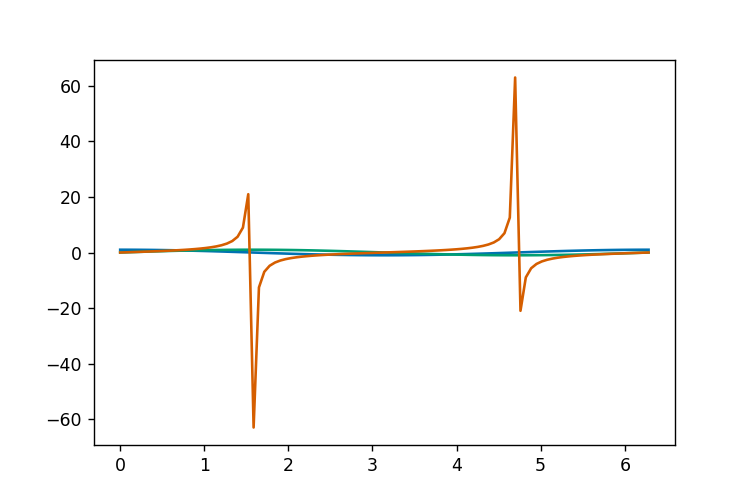

In [3]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(6, 4))

# 設定 x & y 的數據
x = np.linspace(0, 2*np.pi, 100)
y_cos = np.cos(x)
y_sin = np.sin(x) 
y_tan = np.tan(x) 

# plot
plt.plot(x, y_cos)
plt.plot(x, y_sin)
plt.plot(x, y_tan)

plt.show()

### 繪圖參數調整與優化

<IPython.core.display.Javascript object>


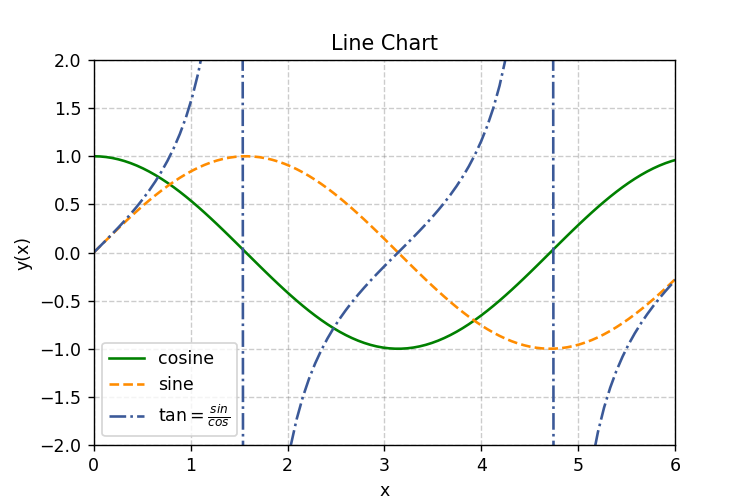

In [4]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(6, 4))

# plot
plt.plot(x, y_cos, color="green",      linestyle="solid",   label="cosine")
plt.plot(x, y_sin, color="darkorange", linestyle="dashed",  label="sine")
plt.plot(x, y_tan, color="#3b5998",    linestyle="dashdot", label=r"tan$=\frac{sin}{cos}$")

# 設定 x & y 的上/下限
plt.xlim(0, 6)
plt.ylim(-2 ,2)
# 增加網格
plt.grid(color="grey", linestyle="--", alpha=0.4)
# 增加座標名
plt.xlabel("x")
plt.ylabel("y(x)")


plt.title("Line Chart")
plt.legend(loc="lower left")
plt.show()

### 2. 散佈圖 scatter chart

<IPython.core.display.Javascript object>


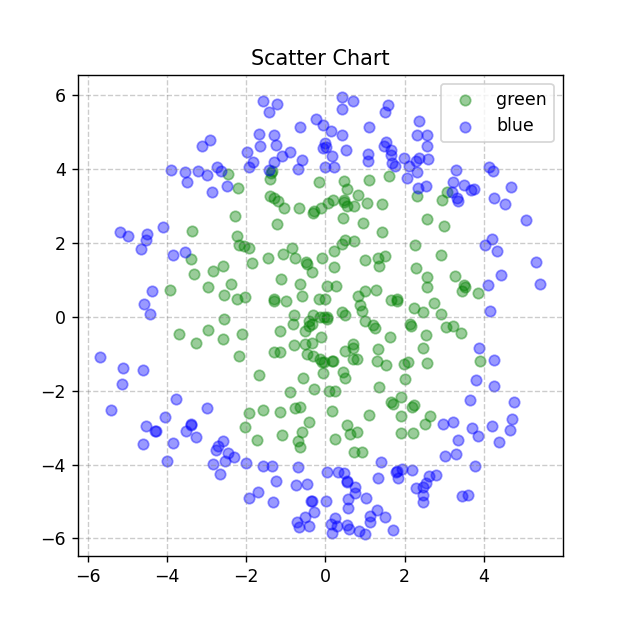

In [9]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(5, 5))

# set data
r1 = 2
x1 = np.random.uniform(-2, 2, 200)
y1 = np.random.choice([-1, 1], 200) * np.sqrt(r1**2 - x1**2)
x1 = x1 + np.random.uniform(-2, 2, 200)
y1 = y1 + np.random.uniform(-2, 2, 200)

r2 = 5
x2 = np.random.uniform(-5, 5, 200)
y2 = np.random.choice([-1, 1], 200) * np.sqrt(r2**2 - x2**2)
x2 = x2 + np.random.uniform(-1, 1, 200)
y2 = y2 + np.random.uniform(-1, 1, 200)

# plot
plt.scatter(x1, y1, color="green", marker="o", alpha=0.4, label="green")
plt.scatter(x2, y2, color="blue",  marker="^", alpha=0.4, label="blue")

# 增加網格
plt.grid(color="grey", linestyle="--", alpha=0.4)


plt.title("Scatter Chart")
plt.legend(loc="upper right")
plt.show()

In [10]:
### 3. 長條圖 bar chart

In [11]:
df = pd.read_csv("../../data/top10_Language.csv")
df

,Year,Month,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,2004,7,0.0034,0.0036,0.1008,0.0471,0.0043,0.0000,0.0282,0.0000,...,0.1875,0.0253,0.0039,0.0033,0.0008,0.0003,0.0000,0.0000,0.0144,0.0856
1,2004,8,0.0036,0.0036,0.0981,0.0499,0.0046,0.0000,0.0267,0.0000,...,0.1926,0.0264,0.0041,0.0040,0.0009,0.0003,0.0000,0.0000,0.0146,0.0857
2,2004,9,0.0041,0.0041,0.0963,0.0506,0.0051,0.0000,0.0265,0.0000,...,0.1949,0.0272,0.0040,0.0041,0.0010,0.0003,0.0000,0.0000,0.0155,0.0841
3,2004,10,0.0040,0.0038,0.0950,0.0531,0.0053,0.0000,0.0277,0.0000,...,0.1934,0.0292,0.0042,0.0046,0.0011,0.0004,0.0000,0.0000,0.0161,0.0849
4,2004,11,0.0038,0.0038,0.0952,0.0524,0.0055,0.0000,0.0276,0.0000,...,0.1943,0.0284,0.0041,0.0045,0.0013,0.0004,0.0000,0.0000,0.0150,0.0824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021,4,0.0048,0.0085,0.0667,0.0686,0.0038,0.0054,0.0027,0.0135,...,0.0617,0.2994,0.0377,0.0116,0.0109,0.0069,0.0176,0.0188,0.0125,0.0074
202,2021,5,0.0051,0.0084,0.0659,0.0685,0.0040,0.0063,0.0027,0.0137,...,0.0607,0.3007,0.0386,0.0108,0.0111,0.0070,0.0180,0.0191,0.0131,0.0071
203,2021,6,0.0047,0.0081,0.0651,0.0687,0.0044,0.0066,0.0028,0.0133,...,0.0582,0.3004,0.0380,0.0109,0.0125,0.0071,0.0187,0.0197,0.0125,0.0072
204,2021,7,0.0045,0.0082,0.0646,0.0665,0.0050,0.0071,0.0024,0.0128,...,0.0584,0.2977,0.0387,0.0101,0.0129,0.0082,0.0187,0.0202,0.0119,0.0076


In [24]:
# 設定每個programming language自己的顏色
colors = plt.cm.rainbow(np.linspace(0, 1, 28))
colorMap = dict()
idx = 0
for col in df.columns[2:]:
    colorMap[col] = colors[idx]
    idx += 1
    
colorMap

{'Abap': array([0.5, 0. , 1. , 1. ]),
 'Ada': array([0.42941176, 0.11065268, 0.9984636 , 1.        ]),
 'C/C++': array([0.35882353, 0.21994636, 0.99385914, 1.        ]),
 'C#': array([0.28039216, 0.33815827, 0.98516223, 1.        ]),
 'Cobol': array([0.20980392, 0.44021574, 0.9741386 , 1.        ]),
 'Dart': array([0.13137255, 0.54721955, 0.95838122, 1.        ]),
 'Delphi/Pascal': array([0.06078431, 0.63647424, 0.94108925, 1.        ]),
 'Go': array([0.01764706, 0.72643357, 0.91848699, 1.        ]),
 'Groovy': array([0.08823529, 0.79801723, 0.89516329, 1.        ]),
 'Haskell': array([0.16666667, 0.8660254 , 0.8660254 , 1.        ]),
 'Java': array([0.2372549 , 0.9160336 , 0.83698911, 1.        ]),
 'JavaScript': array([0.31568627, 0.95838122, 0.80171428, 1.        ]),
 'Julia': array([0.38627451, 0.98408634, 0.76736268, 1.        ]),
 'Kotlin': array([0.46470588, 0.9984636 , 0.72643357, 1.        ]),
 'Lua': array([0.53529412, 0.9984636 , 0.68723669, 1.        ]),
 'Matlab': array([0

<IPython.core.display.Javascript object>


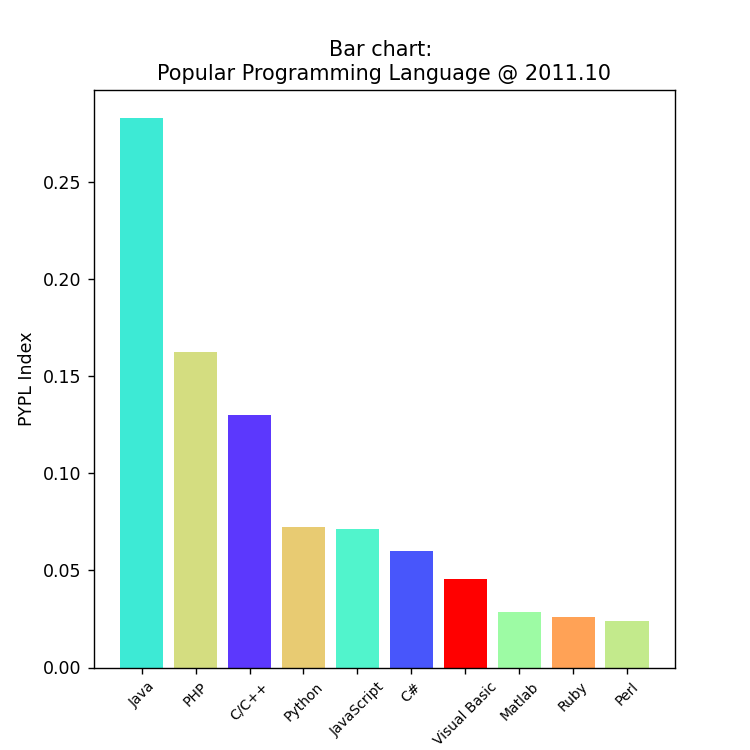

In [25]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(6, 6))

idx = 87

loc_data = df.iloc[idx]
loc_data = loc_data[2:].sort_values(axis=0, ascending=False)

x = loc_data.index[:10]
y = loc_data[:10]
loc_cmap = [colorMap[col] for col in x]

plt.bar(x, y, color=loc_cmap)

plt.ylabel("PYPL Index")
plt.title("Bar chart: \nPopular Programming Language @ %d.%d" %(df.loc[idx, "Year"], df.loc[idx, "Month"]))

plt.xticks(rotation=45, fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


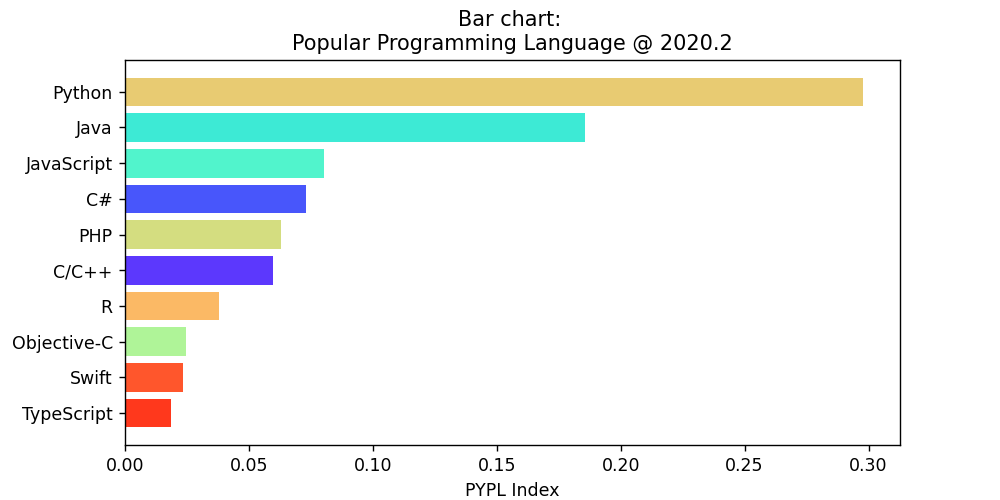

In [30]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(8, 4))

idx = 187

loc_data = df.iloc[idx]
loc_data = loc_data[2:].sort_values(ascending=False)

x = loc_data.index[:10]
y = loc_data[:10]
loc_cmap = [colorMap[col] for col in x]

plt.barh(x, y, color=loc_cmap)

plt.xlabel("PYPL Index")
plt.title("Bar chart: \nPopular Programming Language @ %d.%d" %(df.loc[idx, "Year"], df.loc[idx, "Month"]))

plt.gca().invert_yaxis()
plt.show()

### 4. 直方圖 Histogram

<IPython.core.display.Javascript object>


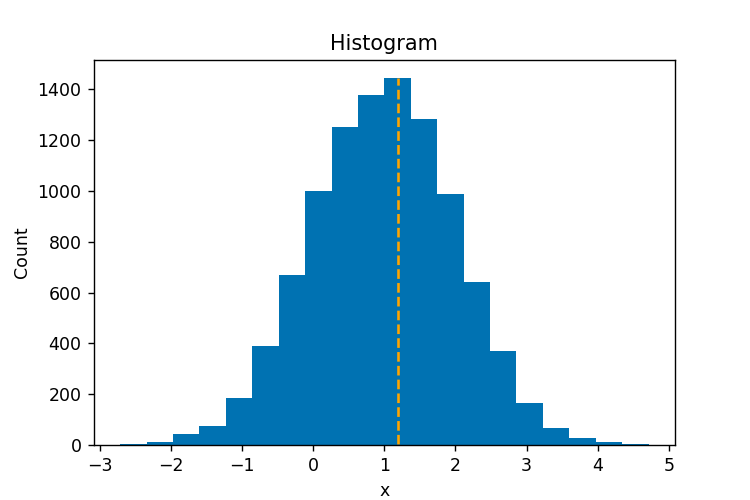

[1.07191946 0.26940639 1.3218811  ... 0.24540853 2.218893   0.66264967]


In [27]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(6, 4))

# set random data
mean = 1
std = 1
data = np.random.normal(mean, std, 10000)
#print(data)
 
# plot
plt.hist(data, bins=20)

plt.ylabel("Count")
plt.xlabel("x")

plt.title("Histogram")

plt.show()

### 5. 圓餅圖

<IPython.core.display.Javascript object>


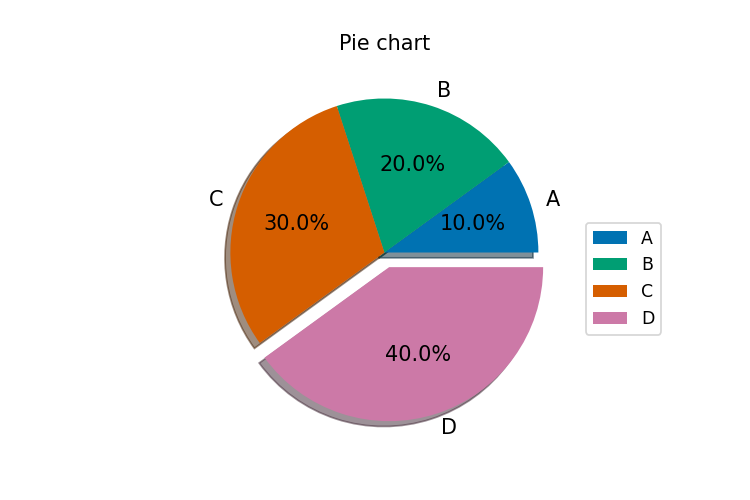

In [29]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(6, 4))


# set data
pie_data = [11, 22, 33, 44]

plt.pie(pie_data,                       # 數值
        labels = ["A", "B", "C", "D"],  # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位 單位%% 才能正常顯示%
        pctdistance = 0.6,              # 數字距圓心的距離
        explode = [0, 0, 0, 0.1],       # 設定分隔的區塊位置
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=True,                    # 設定陰影
        counterclock=True)              # 順時鐘


plt.legend(bbox_to_anchor=(1.0, 0.6))
plt.title("Pie chart")
plt.show()

### 6. 箱型圖

<IPython.core.display.Javascript object>


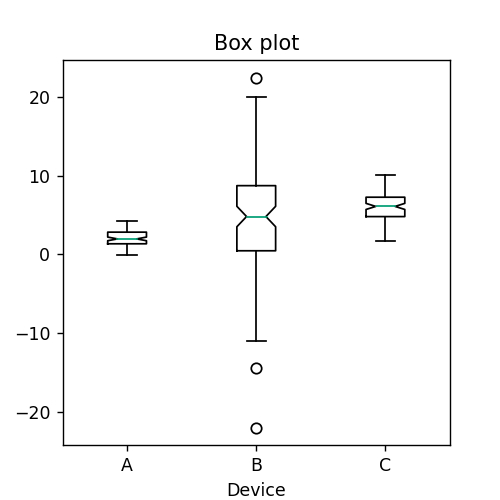

In [35]:
# 生成figure 並設定figure的大小
plt.figure(figsize=(4, 4))

# set random data
deviceA = np.random.normal(2, 1, 100)
deviceB = np.random.normal(4, 8, 100)
deviceC = np.random.normal(6, 2, 100)
data = [deviceA, deviceB, deviceC]

plt.boxplot(data,                      # 數據
            labels=["A", "B", "C"],    # 圖標
            notch=True,                # 中位數是否有缺口
            vert=True,                 # 垂直顯示
            showfliers=True)           # 顯示離群值
            
            
plt.xlabel("Device")
plt.title("Box plot")
plt.show()

## II. 圖型容器(container)

Containers are any object that holds an arbitrary number of other objects. Generally, containers provide a way to access the contained objects and to iterate over them.

Examples of containers include **tuple, list, set, dict**; these are the built-in containers.

ref: https://stackoverflow.com/questions/11575925/what-exactly-are-containers-in-python-and-what-are-all-the-python-container

### 就是用來繪製更細節的方式

<IPython.core.display.Javascript object>


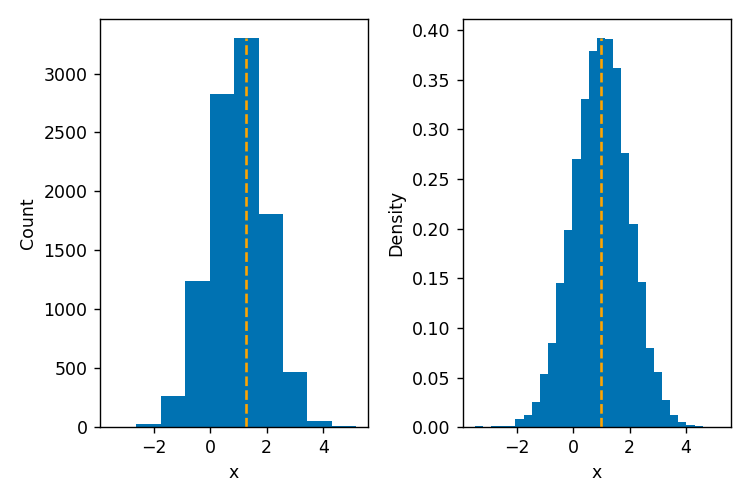

In [38]:
# 生成figure 並設定figure的大小
#fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(6, 4)) # more pythonic
fig = plt.figure(figsize=(6, 4)) # fig: The top level container for all the plot elements.
ax1 = fig.add_subplot(1,2,1)     # ax: the element in this fig
ax2 = fig.add_subplot(1,2,2)     # (row, col, index)

# set random data
mean = 1
std = 1
data = np.random.normal(mean, std, 10000)
#print(data)

# 取得 hist統計好的數據x, y
y1, x1, patches1 = ax1.hist(data, bins=10)

y_max = y1.max()
y_min = y1.min()
y_max_idx = y1.argmax()
x_max = (x1[y_max_idx] + x1[y_max_idx+1]) / 2

# 畫出最高峰的位置
ax1.vlines(x_max, y_min, y_max, linestyles="dashed", color="orange")
# 設定axes 1的繪圖細節
ax1.set_ylabel("Count")
ax1.set_xlabel("x")

# 取得 hist統計好的數據x, y
y2, x2, patches2 = ax2.hist(data, bins=30, density=True)

y_max = y2.max()
y_min = y2.min()
y_max_idx = y2.argmax()
x_max = (x2[y_max_idx] + x2[y_max_idx+1]) / 2

# 畫出最高峰的位置
ax2.vlines(x_max, y_min, y_max, linestyles="dashed", color="orange")
# 設定axes 2的繪圖細節
ax2.set_ylabel("Density")
ax2.set_xlabel("x")

plt.tight_layout()

plt.show()

In [39]:
for detail in patches1:
    print(detail)

Rectangle(xy=(-3.48214, 0), width=0.865122, height=4, angle=0)
Rectangle(xy=(-2.61702, 0), width=0.865122, height=30, angle=0)
Rectangle(xy=(-1.7519, 0), width=0.865122, height=263, angle=0)
Rectangle(xy=(-0.886774, 0), width=0.865122, height=1237, angle=0)
Rectangle(xy=(-0.0216524, 0), width=0.865122, height=2826, angle=0)
Rectangle(xy=(0.84347, 0), width=0.865122, height=3300, angle=0)
Rectangle(xy=(1.70859, 0), width=0.865122, height=1808, angle=0)
Rectangle(xy=(2.57371, 0), width=0.865122, height=470, angle=0)
Rectangle(xy=(3.43884, 0), width=0.865122, height=56, angle=0)
Rectangle(xy=(4.30396, 0), width=0.865122, height=6, angle=0)


## III. 動畫繪製

## 取得被繪製的物件，隨著frame改變物件的設定，達到動畫的效果

<IPython.core.display.Javascript object>


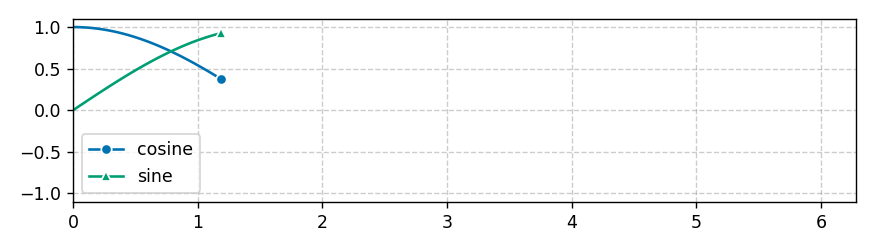

In [34]:
# animaiton demo 1: sin/cos-curve plot
fig = plt.figure(figsize=(7, 2))

# set data
x = np.linspace(0, 2*np.pi, 256)
y_cos = np.cos(x)
y_sin = np.sin(x) 

# set line
line1, = plt.plot(x, y_cos, marker="o", markevery=[-1], markeredgecolor="white", label="cosine")
line2, = plt.plot(x, y_sin, marker="^", markevery=[-1], markeredgecolor="white", label="sine")
#list_line1 = plt.plot(x, y_cos, marker="o", markevery=[-1], markeredgecolor="white", label="cosine")
#line1 = list_line1[0]
#list_line2 = plt.plot(x, y_sin, marker="^", markevery=[-1], markeredgecolor="white", label="sine")
#line2 = list_line2[0]


# plot setting
plt.xlim(0, 2*np.pi)
plt.tight_layout()
plt.legend(loc="lower left")
plt.grid(color="grey", linestyle="--", alpha=0.4)

# func
def update(frame):
    line1.set_data(x[:frame], y_cos[:frame])
    line2.set_data(x[:frame], y_sin[:frame])


# 繪製動畫
# animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, 
#                         cache_frame_data=True, **kwargs)
# 常用參數
# fig: 圖object
# func: 數據更新function
# frames: 數據更新function的輸入變數規則，預設為 t=0, 1, 2 ... 可自訂 frames=np.arange(10, 30, 2) 代表 t=10, 12, 14 ...
# init_func: t=0的數據
# save_count: 張數上限，如果frame已到達指定數字，就停止更新
# cache_frame_data: default=True, data快取，選擇False可以使數據量很大圖比較不LAG
# blit: 優化繪圖方式(看不出差異...)
# interval: 每一張frame的間隔(ms)
ani = animation.FuncAnimation(fig, update, save_count=256, cache_frame_data=False, 
                              blit=True, interval=30)

plt.show()

#To save the animation, use e.g.
#
#ani.save("sin_cos_plot.gif", writer="pillow", dpi=100)
#
# or
#
#ani.save("sin_cos_plot.mp4", writer="ffmpeg", fps=30, dpi=100)


# Animation: popular programming language

In [41]:
df = pd.read_csv("../../data/top10_Language.csv")
df

,Year,Month,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,2004,7,0.0034,0.0036,0.1008,0.0471,0.0043,0.0000,0.0282,0.0000,...,0.1875,0.0253,0.0039,0.0033,0.0008,0.0003,0.0000,0.0000,0.0144,0.0856
1,2004,8,0.0036,0.0036,0.0981,0.0499,0.0046,0.0000,0.0267,0.0000,...,0.1926,0.0264,0.0041,0.0040,0.0009,0.0003,0.0000,0.0000,0.0146,0.0857
2,2004,9,0.0041,0.0041,0.0963,0.0506,0.0051,0.0000,0.0265,0.0000,...,0.1949,0.0272,0.0040,0.0041,0.0010,0.0003,0.0000,0.0000,0.0155,0.0841
3,2004,10,0.0040,0.0038,0.0950,0.0531,0.0053,0.0000,0.0277,0.0000,...,0.1934,0.0292,0.0042,0.0046,0.0011,0.0004,0.0000,0.0000,0.0161,0.0849
4,2004,11,0.0038,0.0038,0.0952,0.0524,0.0055,0.0000,0.0276,0.0000,...,0.1943,0.0284,0.0041,0.0045,0.0013,0.0004,0.0000,0.0000,0.0150,0.0824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021,4,0.0048,0.0085,0.0667,0.0686,0.0038,0.0054,0.0027,0.0135,...,0.0617,0.2994,0.0377,0.0116,0.0109,0.0069,0.0176,0.0188,0.0125,0.0074
202,2021,5,0.0051,0.0084,0.0659,0.0685,0.0040,0.0063,0.0027,0.0137,...,0.0607,0.3007,0.0386,0.0108,0.0111,0.0070,0.0180,0.0191,0.0131,0.0071
203,2021,6,0.0047,0.0081,0.0651,0.0687,0.0044,0.0066,0.0028,0.0133,...,0.0582,0.3004,0.0380,0.0109,0.0125,0.0071,0.0187,0.0197,0.0125,0.0072
204,2021,7,0.0045,0.0082,0.0646,0.0665,0.0050,0.0071,0.0024,0.0128,...,0.0584,0.2977,0.0387,0.0101,0.0129,0.0082,0.0187,0.0202,0.0119,0.0076


In [42]:
colors = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]-2))
colorMap = dict()
idx = 0
for col in df.columns[2:]:
    colorMap[col] = colors[idx]
    idx += 1

<IPython.core.display.Javascript object>


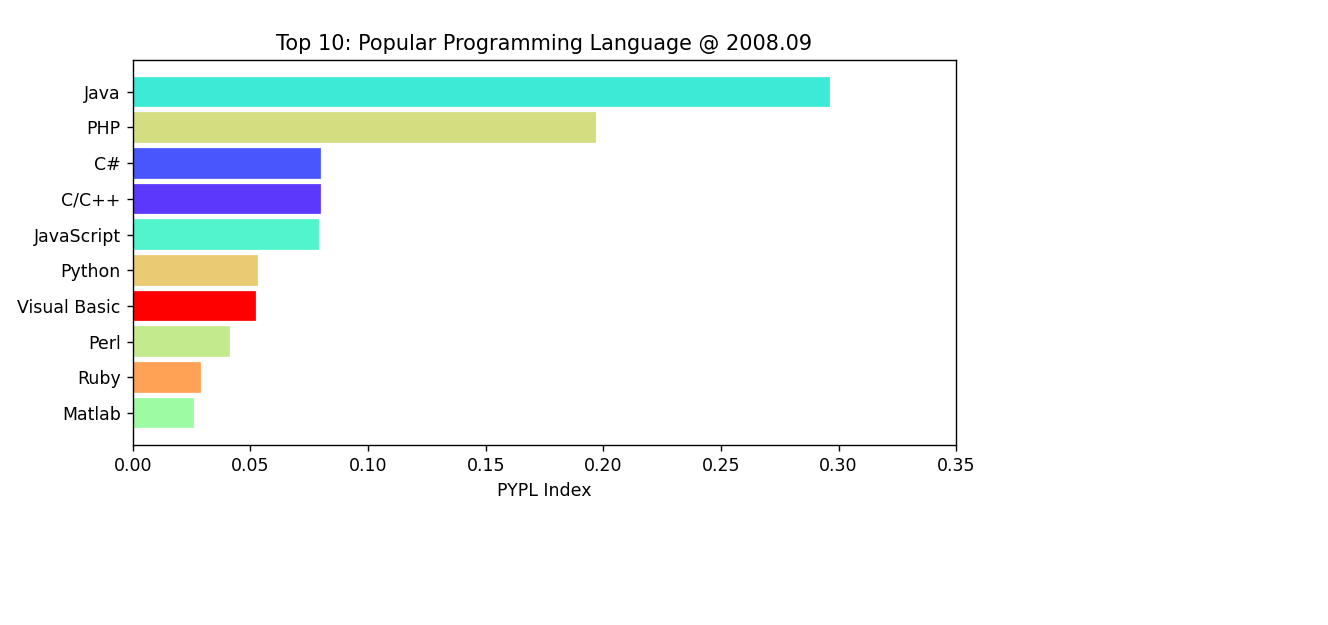

In [43]:
# animaiton demo 2: popular programming language race
fig = plt.figure(figsize=(8.5, 4))
ax = plt.subplot()

# set data
topNum = 10
loc_data = df.iloc[0]
loc_data = loc_data[2:].sort_values(ascending=False)

# get top 10 data
x = loc_data.index[:topNum]
y = loc_data[:topNum]
loc_cmap = [colorMap[col] for col in x]
    
# get list of bar constainer
barContainer = plt.barh(x, y, color=loc_cmap)

# plot setting
plt.xlabel("PYPL Index")
plt.title("Top %d: Popular Programming Language @ %d.%02d" %(topNum, df.loc[0, "Year"], df.loc[0, "Month"]))
plt.xlim(0, 0.35)
ax.invert_yaxis()


# func
def update(frame):
    
    # get local data
    loc_data = df.iloc[frame]
    loc_data = loc_data[2:].sort_values(ascending=False)
    
    # get top N data
    x = loc_data.index[:topNum]
    y = loc_data[:topNum]
    loc_cmap = [colorMap[col] for col in x]
    
    # set plot data
    for idx in range(topNum):
        barContainer[idx].set_width(y[idx])
        barContainer[idx].set_color(loc_cmap[idx])
        
    # update ticks and title
    plt.yticks(range(topNum), x)
    plt.title("Top %d: Popular Programming Language @ %d.%02d" %(topNum, df.loc[frame, "Year"], df.loc[frame, "Month"]))


# 繪製動畫
ani = animation.FuncAnimation(fig, update, frames=df.shape[0], cache_frame_data=False, 
                              blit=True, interval=150)

plt.show()

#To save the animation, use e.g.
#
#ani.save("sin_cos_plot.gif", writer="pillow", dpi=100)
#
# or
#
#ani.save("PPLtest2.mp4", writer="ffmpeg", fps=6, dpi=160)